<a href="https://colab.research.google.com/github/dxv2k/Chest-X-ray-Abnormalities-Detection/blob/main/inference_submission_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset, data Config & Mounting Drive with Yolo

In [ ]:
data_folder_path = "/content/drive/MyDrive/Data/"  
zip_data_path = "/content/drive/MyDrive/Data/yolo_data.zip"  

config_dataset = "/content/drive/MyDrive/Data/dataset.yaml"  

In [ ]:
!echo $data_path
!echo $data_folder_path

/content/drive/MyDrive/Data/yolo_data.zip
/content/drive/MyDrive/Data/


In [ ]:
!unzip $zip_data_path -d $data_folder_path
!ls

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Data/images/train/e2321f70d075c658946e167356ef516c.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/b59dc05efd7fe99cc96902b2c04ad8c3.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/67e142bee76b89f0ca09bab8d7adaa2e.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/dadf619a987c90a4f2c250ae26ed2041.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/dc4d73c10876b27e063b584d49eea496.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/83b7785191c812c71f06b948e5843515.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/26fd27f25c4c5329c224f75f5f94d96c.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/7430af9cdc5fa56f86d71b66a837390c.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/c8cef7f9bbed9e8303371f940dcfc495.jpg  
  inflating: /content/drive/MyDrive/Data/images/train/0712b4f7b21e2a06eacece3cf35e3059.jpg  
  inflating: /conte

# Check GPU 

In [ ]:
!nvidia-smi

Sun Mar 21 13:56:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Clone YOLOv5 repo 


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 5437, done.
remote: Total 5437 (delta 0), reused 0 (delta 0), pack-reused 5437
Receiving objects: 100% (5437/5437), 8.07 MiB | 33.85 MiB/s, done.
Resolving deltas: 100% (3717/3717), done.


# Install requirements

In [ ]:
%cd yolov5
!ls 

/content/yolov5
data	    hubconf.py	README.md	  train.py	  weights
detect.py   LICENSE	requirements.txt  tutorial.ipynb
Dockerfile  models	test.py		  utils


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 645kB 14.1MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Test run YOLOv5 & Download Pretrained model


In [ ]:
! python detect.py --source data/images --weights yolov5x.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov5x.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

100% 168M/168M [00:02<00:00, 82.5MB/s]

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 potted plant, Done. (0.074s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.043s)
Results saved to runs/detect/exp
Done. (0.310s)


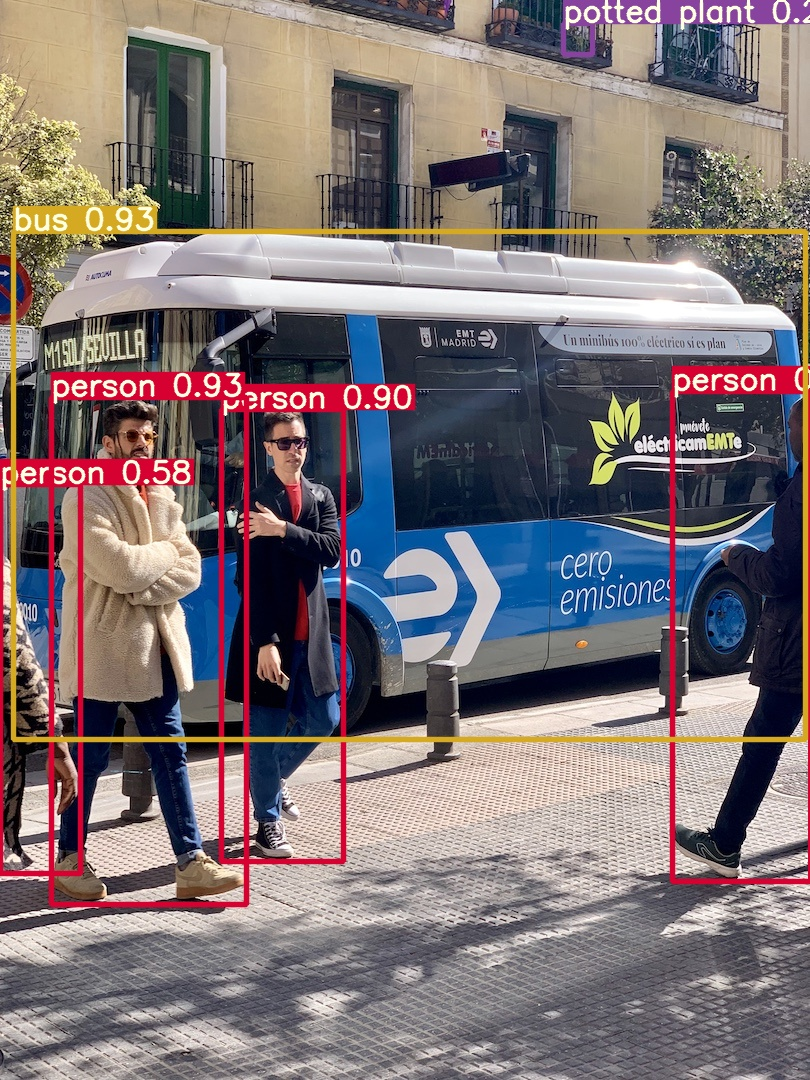

In [ ]:
from IPython.display import Image
Image('/content/yolov5/runs/detect/exp/bus.jpg')

# Train model

In [ ]:
!ls

data	    images   __pycache__       test.py	       weights
detect.py   labels   README.md	       train.py        yolov5x.pt
Dockerfile  LICENSE  requirements.txt  tutorial.ipynb
hubconf.py  models   runs	       utils


In [ ]:
! python train.py --data "./dataset.yaml" --cfg yolov5x.yaml --weights '' --batch-size 16

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5x.yaml', data='./dataset.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-21 14:18:23.786754: I tensorflow/stream_executor/platform/default/dso_loader.

# Inference 

# Generate submission

In [ ]:
N = 3000 